In [ ]:
#12章 分類の手法を学ぼう

#　分類とは、カテゴリーを予測する分析手法
#  分類の予測モデルは、教師あり学習で構築
#　説明変数と目的変数がセットのデータが必要
#　決定木の予測モデルは、条件分岐の構造に制約を設けてシンプルにすることで、予測精度が高まる可能性
#    →過学習（分岐が複雑→訓練データに過度に適合→新しいデータをうまく一般化できない）
#    →過学習を避ける（重要な特徴だけに焦点→シンプルなモデルを優先→人間に理解しやすい→新しいデータに良い汎用性）
#      https://terakoya.sejuku.net/question/detail/47726

In [ ]:
# 1. 課題把握とゴールの設定

# 課題
#　・乳房のしこりの検査データから、悪性であるか良性であるかを判断したい。
#　・特に、悪性の判断を見落とさないようにしたい。
#　・予測結果を診断の参考情報とするため、どのようなロジックで予測が行われたかを明確にしてほしい。

# ゴール
#　・しこりの検査データから、悪性か良性かを判定する分類の予測モデルを構築する。悪性の見落としの少ない予測モデルが望ましい。
#　・悪性か良性かの判定根拠を可視化する。

In [ ]:
# 2. 必要なライブラリのインポート
import pandas as pd

In [ ]:
# 3. データの取得

#乳房のしこりの検査データと、そのデータに対する悪性/良性を示したサンプルデータ
from sklearn.datasets import load_breast_cancer

In [ ]:
# 関数を変数に代入(連想配列のデータを取得)
# 連想配列…好きな名前を添え字にできる配列（ex:ミカン箱：和歌山・愛媛)
#   参考：https://wa3.i-3-i.info/word11931.html
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# 4. データの概要確認と前処理

In [ ]:
print(dataset.DESCR)

# データ解釈
#　・検査データは30項目で、半径やコンパクト性、へこみ具合などの項目がある。
#　・項目ごとに、平均値、標準誤差、ワースト値もしくは最大値を示している。
#　・データ数は569であり、それぞれ悪性もしくは良性に分類される。

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
# データ内容確認
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [ ]:
# 悪性/良性を示すデータを「class」という列名でDataFrameに追加
df['class'] = dataset.target
df.head()
# 0が悪性、1が良性

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  class  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

In [ ]:
# データサイズ確認
df.shape
# 569行(データ数)、31列(30種類の検査データ、1種類の悪性/良性フラグ)

(569, 31)

In [ ]:
# データ欠損確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

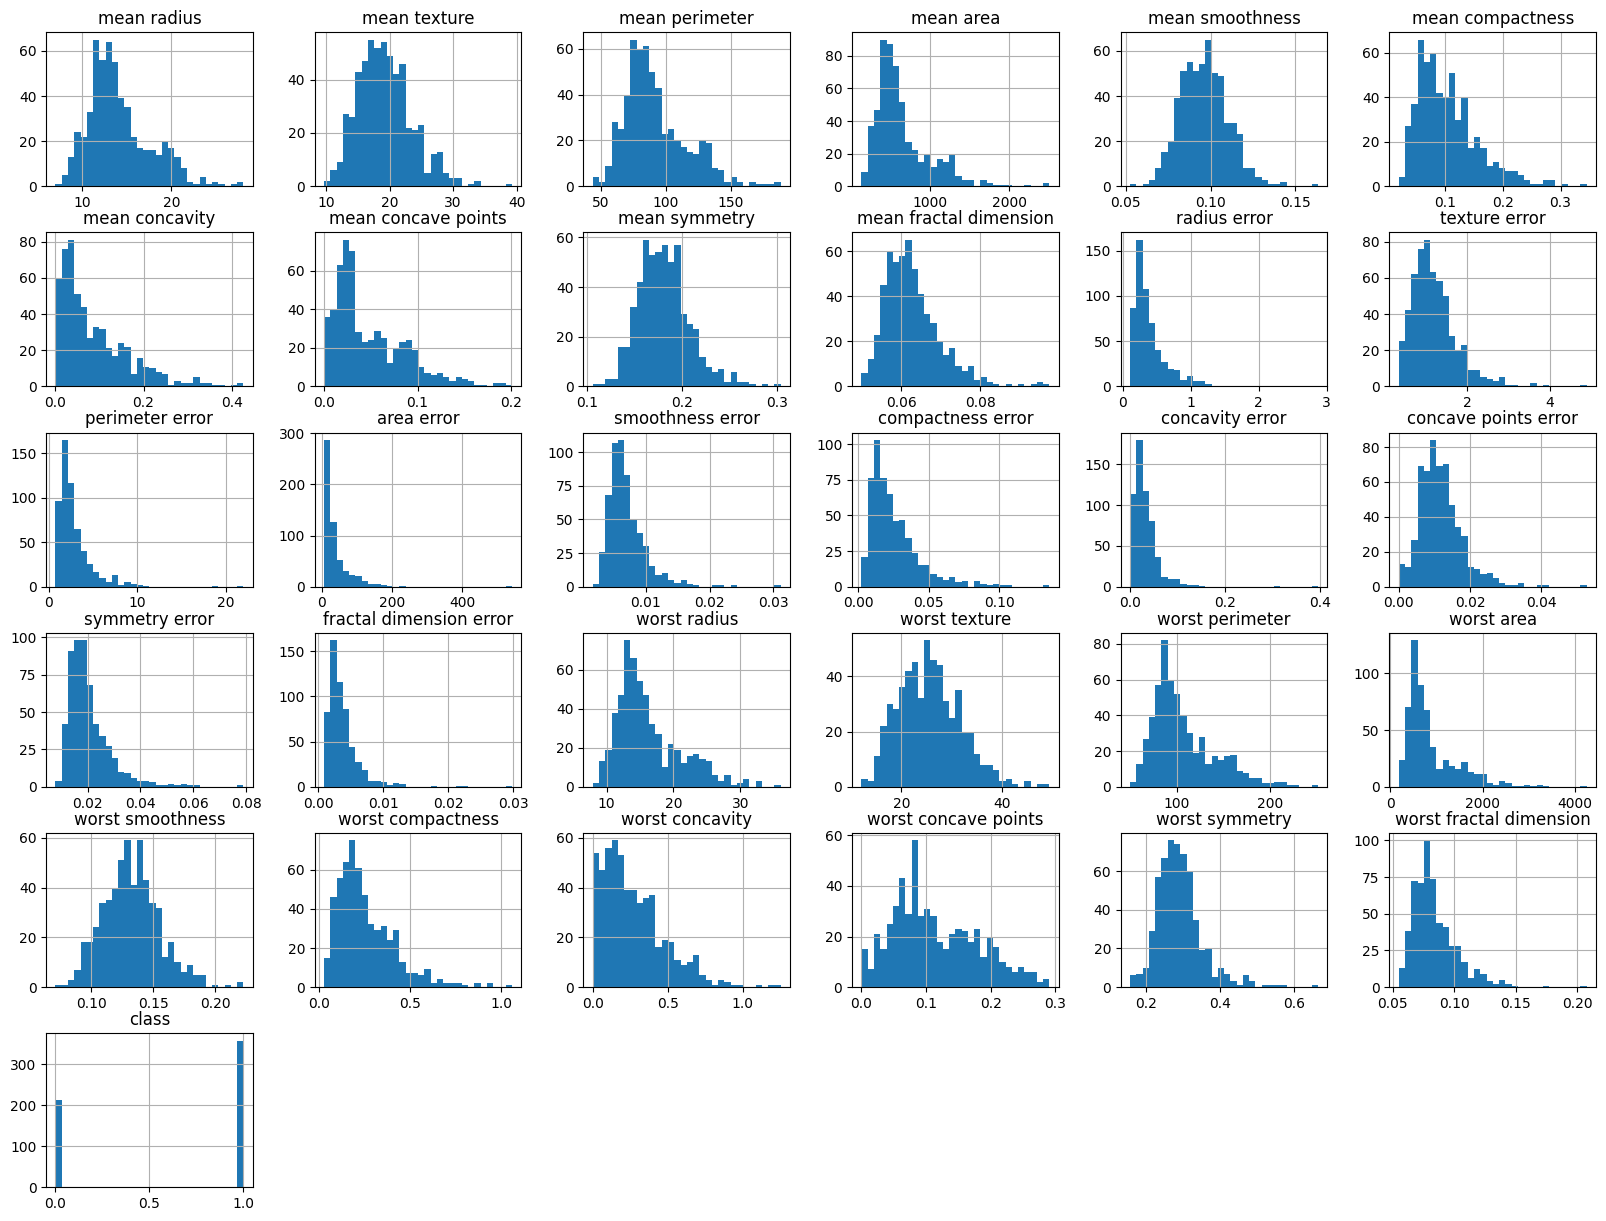

In [ ]:
# 外れ値確認
# 重なり具合:figsize　ヒストグラムのバー数:bins(検査データの数)
df.hist(figsize=(20,15),bins=30)

# 目立った外れ値はない→前処理不要

In [ ]:
# 5. 学習データとテストデータへの分割

In [ ]:
# 説明変数X(class以外の全列)と目的変数y(class列)に分ける
X = df.drop(columns=['class']).to_numpy()
y = df['class'].to_numpy()

In [ ]:
# 比率7:3で学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
# 分割結果確認
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [ ]:
# 6. 予測モデルの学習

In [ ]:
# 決定木の予測モデルに対して学習
#  決定木は乱数を使用する場合あり→避ける場合random_stateを指定
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

In [ ]:
# 学習データで学習させる
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# 7. 予測モデルの評価

In [ ]:
# 説明変数Xのテストデータから悪性/良性の予測値を出力
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
# 実際の値である目的変数のテストデータを確認
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
# 評価指標を出力
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#　　　　　　　　　適合率　　再現率　　Ｆ値　　実際のデータ数
#　　　　0:悪性　　　　　　　　②
#　　　　1:良性
#        正解率　　　　　　　　　　　　 ①
#        平均値
#　　　　加重平均

#　①乳房のしこりの検査データから、悪性であるか良性であるかを判断したい→９１％
#  ②特に、悪性の判断を見落とさないようにしたい→９４％

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        63
           1       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



In [ ]:
# 8. 予測

In [ ]:
# ファイル読み込み
df_X_new = pd.read_csv('/content/data_breastcancer.csv')
df_X_new.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0           15            25              83        643             0.08   
1           13            18              84        587             0.06   
2           14            22              87        587             0.13   
3           12            19              90        589             0.09   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0              0.04            0.05                 0.02            0.2   
1              0.06            0.02                 0.01            0.2   
2              0.09            0.02                 0.08            0.1   
3              0.07            0.03                 0.01            0.1   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                    0.04  ...            14             34               90   
1                    0.05  ...            15             19              100   
2                    0.05  ...            15             29              113   
3                    0.06  ...            15             25              108   

   worst area  worst smoothness  worst compactness  worst concavity  \
0         600              0.10                0.1             0.10   
1         700              0.10                0.2             0.09   
2         800              0.10                0.2             0.50   
3         800              0.09                0.2             0.14   

   worst concave points  worst symmetry  worst fractal dimension  
0                  0.06             0.2                     0.06  
1                  0.08             0.2                     0.06  
2                102.00             0.1                     0.09  
3                  0.08             0.2                     0.06  

[4 rows x 30 columns]

In [ ]:
# 予測モデルを利用して、取り込んだデータが悪性/良性を予測

In [ ]:
# pandasのDataFrame（表形式のデータ）をNumPy配列（数値計算に特化した形式）に変換
X_new = df_X_new.to_numpy()
# 予測
model.predict(X_new)
# 1,2,4行目が良性、3行目が悪性と予測

array([1, 1, 0, 1])

In [ ]:
# 9. 設定したゴールに対する考察

#  ①悪性/良性を判定する予測モデル構築
#  　予測の精度は、正解率が約91%(やや低い)、悪性の再現率は約94%(まずまず)
#　②悪性/良性の判定根拠の可視化
#  　決定木の条件分岐構造を参考

In [ ]:
from sklearn.tree import export_text

In [ ]:
# copilotの回答(決定木の深さ・葉の数、葉に含まれるサンプル数)
depth = model.get_depth()
print(f"決定木の深さは {depth} です")

n_leaves = model.get_n_leaves()
print(f"葉の数は {n_leaves} です")

node_samples = model.tree_.n_node_samples # ノードごとのサンプル数を取得
is_leaf = model.tree_.children_left == -1 # 葉ノードの判定
leaf_samples = node_samples[is_leaf]
print("葉に含まれるサンプル数一覧:", leaf_samples)


決定木の深さは 7 です
葉の数は 19 です
葉に含まれるサンプル数一覧: [  6   1 202   1  16   2   4   2  12   1   3   2  11   3   1   6   2 122
   1]


In [ ]:
#  決定木の条件分岐構造

# 要素名の取得
names = dataset.feature_names
# 要素名をリスト形式に変換
names_list = names.tolist()
# 条件分岐構造を出力(decimals=3は小数点以下3桁に収める)
print(export_text(model,decimals=3,feature_names=names_list))

#　判定ロジック
#　各条件に対してYes/Noで分岐→たどり着いたclassが0:悪性、1:良性という予測結果

|--- worst concave points <= 0.142
|   |--- worst area <= 952.900
|   |   |--- area error <= 35.260
|   |   |   |--- worst concave points <= 0.136
|   |   |   |   |--- smoothness error <= 0.003
|   |   |   |   |   |--- smoothness error <= 0.003
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- smoothness error >  0.003
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- smoothness error >  0.003
|   |   |   |   |   |--- worst texture <= 32.780
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  32.780
|   |   |   |   |   |   |--- worst texture <= 33.805
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- worst texture >  33.805
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- worst concave points >  0.136
|   |   |   |   |--- worst symmetry <= 0.271
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- worst symmetry >  0.271
|   |   |   |   |   |--- class: 1
|   |   |--- area error >  35.260
|   |   |   |---

In [ ]:
# ★SAMURAI質問の回答（よくわからない）
# 現在のハイパーパラメータ値の確認方法？
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [ ]:
# 12.4 予測モデルの改善

In [ ]:
# 1. 条件分岐の構造に対する制約の設定
#    決定木は、条件分岐の構造をシンプルにする
#　　→予測精度が高まる可能性あり
#    →例えば、条件分岐の深さ、木構造の葉の数、葉に含まれるサンプル数を制限
#　　→DecisionTreeClassifierクラスをインスタンス化するタイミングで、これらのハイパーパラメータ設定が可能
#　　→ハイパーパラメータの設定は、試行錯誤して決定、グリッドリサーチ手法
#


In [ ]:
#　　ハイパーパラメータ設定
#　　条件分岐の深さ　　　　　　　　　　max_depth
#　　葉の数の最大値　　　　　　　　　　max_leaf_nodes
#    葉に含まれるサンプル数の最小値	　 min_samples_leaf

model = DecisionTreeClassifier(
    max_depth=2,
    max_leaf_nodes=3,
    min_samples_leaf=10,
    random_state=0)

In [ ]:
# 2. 予測モデルの学習
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_leaf=10,
                       random_state=0)

In [ ]:
# 3. 予測モデルの評価
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))
#　　　　　　　　　適合率　　再現率　　Ｆ値　　実際のデータ数
#　　　　悪性　　　　　　　　　②
#　　　　良性
#        正解率　　　　　　　　　　　　 ①
#        平均値
#　　　　加重平均

#　①乳房のしこりの検査データから、悪性であるか良性であるかを判断したい→９５％(４％ＵＰ)
#  ②特に、悪性の判断を見落とさないようにしたい→９５％（１％ＵＰ）


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        63
           1       0.97      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
# 4. 予測
model.predict(X_new)
# 結果は先程と変わらず

array([1, 1, 0, 1])

In [ ]:
# 5. 設定したゴールに対する考察
# 悪性/良性の判定根拠の可視化
print(export_text(model, decimals=3, feature_names=names_list))
# 改善前と比較して、非常にシンプルな条件分岐構造が出力された

|--- worst concave points <= 0.142
|   |--- worst area <= 952.900
|   |   |--- class: 1
|   |--- worst area >  952.900
|   |   |--- class: 0
|--- worst concave points >  0.142
|   |--- class: 0

